## Text Analysis - LDA



In [6]:
# Importing modules
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

# Regular Expressions - lets us prcicely manipulate strings
import re

# Let's use create a Word Cloud visualisation
from wordcloud import WordCloud

# An NLP library
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Natural language toolkit - another NLP library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Print results nicely
from pprint import pprint

# Visulalisation library for our LDA analysis
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# If you want to save the visualisation data
import pickle 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aad.sray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing Data

In [12]:
df = pd.read_csv('db2023_cleandf.csv')

df['ID'] = range(1, 480)

# Display the DataFrame
print(df)

                                               Comment                 Time  \
0    Posting a bit early so people know where to go...  2023-10-10 11:14:12   
1    20% fare reduction on public transport continu...  2023-10-10 13:55:05   
2                                        This is good.  2023-10-10 14:16:50   
3       Aaaaaahhhhh, what have the Greens done for us!  2023-10-10 16:56:05   
4    €67 million to provide 16,000 craft apprentice...  2023-10-10 14:18:04   
..                                                 ...                  ...   
474                                          [deleted]  2023-10-10 13:30:20   
475                                        You did not  2023-10-10 13:31:29   
476  Whats the 18 year old minimum wage rate going to?  2023-10-10 15:30:22   
477                                      10.16 I'd say  2023-10-10 15:33:48   
478  Yeah forgot its a set rate of 80% of minimum w...  2023-10-10 15:52:32   

     Score   ID  
0        1    1  
1       39    2

In [13]:
df.drop(columns=['Time', 'Score'], inplace=True)

# Display the DataFrame after dropping the 'Time' and 'Score' columns
print("\nDataFrame after dropping 'Time' and 'Score' columns:")
print(df)


DataFrame after dropping 'Time' and 'Score' columns:
                                               Comment   ID
0    Posting a bit early so people know where to go...    1
1    20% fare reduction on public transport continu...    2
2                                        This is good.    3
3       Aaaaaahhhhh, what have the Greens done for us!    4
4    €67 million to provide 16,000 craft apprentice...    5
..                                                 ...  ...
474                                          [deleted]  475
475                                        You did not  476
476  Whats the 18 year old minimum wage rate going to?  477
477                                      10.16 I'd say  478
478  Yeah forgot its a set rate of 80% of minimum w...  479

[479 rows x 2 columns]


In [14]:
df.head()

,Comment,ID
0,Posting a bit early so people know where to go...,1
1,20% fare reduction on public transport continu...,2
2,This is good.,3
3,"Aaaaaahhhhh, what have the Greens done for us!",4
4,"€67 million to provide 16,000 craft apprentice...",5


### Basic EDA visualisation

In [15]:
# Join all the comment text into one long string

long_string = ','.join(df['Comment'])
len(long_string)

63072

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


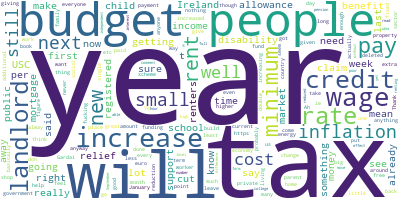

In [16]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Data Preperation

In [17]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [18]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [19]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [20]:
# Getting our texts in a list to process
texts = df['Comment'].values.tolist()

In [21]:
words = list(sent_to_words(texts))

In [22]:
words = remove_stopwords(words) 

In [23]:
len(words)

479

In [24]:
words[0]

['posting',
 'bit',
 'early',
 'people',
 'know',
 'go',
 'starts',
 'feel',
 'free',
 'chat',
 'since',
 'certain',
 'bits',
 'coming',
 'already']

### Transform into features


In [25]:
# Make a dictionary of ids for the words

id2word = corpora.Dictionary(words)

In [26]:
id2word

In [27]:
# Translates our words into their correspoinding ids

corpus = [id2word.doc2bow(text) for text in words]

In [28]:
# Print our corpus

corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1)],
 [(22, 1), (23, 1), (24, 1), (25, 1)],
 [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(21, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(40, 1), (41, 1), (42, 1)],
 [(41, 1), (43, 1), (44, 1), (45, 1)],
 [(46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(59, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)],
 [(11, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1)],
 [(78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),


In [30]:
# Based on 'expert knowledge'
num_topics = 50

In [31]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [32]:
pprint(lda_model.print_topics())

[(25,
  '0.023*"also" + 0.021*"boost" + 0.015*"would" + 0.011*"small" + '
  '0.010*"subsidy" + 0.010*"credit" + 0.010*"scroll" + 0.010*"middle" + '
  '0.010*"energy" + 0.010*"amazing"'),
 (5,
  '0.027*"getting" + 0.015*"relief" + 0.015*"rail" + 0.015*"bus" + '
  '0.015*"funding" + 0.013*"increased" + 0.013*"well" + 0.010*"infrastructure" '
  '+ 0.010*"electric" + 0.010*"bn"'),
 (11,
  '0.018*"two" + 0.018*"year" + 0.013*"salary" + 0.013*"people" + 0.013*"uk" + '
  '0.013*"well" + 0.013*"take" + 0.013*"inflation" + 0.009*"make" + '
  '0.009*"minimum"'),
 (23,
  '0.033*"support" + 0.022*"income" + 0.022*"additional" + 0.022*"people" + '
  '0.011*"buying" + 0.011*"still" + 0.011*"parents" + 0.011*"great" + '
  '0.011*"unaware" + 0.011*"fuel"'),
 (40,
  '0.028*"small" + 0.021*"wage" + 0.013*"ireland" + 0.012*"tax" + '
  '0.011*"credit" + 0.011*"get" + 0.011*"minimum" + 0.010*"like" + '
  '0.010*"feel" + 0.010*"buisness"'),
 (14,
  '0.026*"budget" + 0.020*"usc" + 0.016*"move" + 0.015*"tax" 

### Visualisation 

In [33]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [34]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.168404  0.042628       1        1  5.698304
46     0.124837  0.107279       2        1  4.358658
38     0.078958  0.077044       3        1  4.068551
48    -0.015942 -0.203356       4        1  3.629543
17     0.032601  0.098186       5        1  3.556317
30     0.154540 -0.070218       6        1  3.290220
29    -0.002379 -0.097094       7        1  3.221945
11    -0.016399  0.032784       8        1  3.199237
5      0.055438 -0.068390       9        1  2.854479
22     0.085945  0.003391      10        1  2.810228
40    -0.016731  0.069908      11        1  2.752078
35    -0.034511 -0.064039      12        1  2.643864
9     -0.021879  0.034171      13        1  2.565391
14     0.025193  0.014878      14        1  2.504885
8     -0.034074  0.011163      15        1  2.483053
18     0.032348 -0.060633      16        1  2.294802
0      0.008342  0.062942      17        1  2.084186
33    -0.047697 -0.001937      18        1  2.065288
2     -0.021079  0.046494      19        1  2.031565
26    -0.058771 -0.009870      20        1  1.996499
15    -0.121359  0.060817      21        1  1.995568
12    -0.005679  0.001734      22        1  1.954328
41     0.023572 -0.059098      23        1  1.937948
37     0.079025 -0.043317      24        1  1.908843
49     0.085947  0.053027      25        1  1.861487
10     0.026144 -0.055698      26        1  1.854482
27    -0.027631  0.024027      27        1  1.759481
6      0.050664 -0.075339      28        1  1.719744
42    -0.003583  0.081009      29        1  1.691255
4     -0.004581 -0.057308      30        1  1.642956
24     0.021566 -0.031268      31        1  1.542000
25    -0.076342  0.018029      32        1  1.523245
47    -0.088957 -0.125698      33        1  1.517193
20     0.005829 -0.028384      34        1  1.460599
31    -0.080555  0.010883      35        1  1.459666
1      0.000781 -0.058880      36        1  1.414588
44    -0.020467 -0.025951      37        1  1.329264
21    -0.048520  0.047755      38        1  1.141339
36    -0.037465  0.026634      39        1  1.133240
28     0.044437  0.017068      40        1  1.026359
45    -0.029551  0.002295      41        1  0.985187
32    -0.013718 -0.027253      42        1  0.948081
23    -0.056444  0.036515      43        1  0.941227
16    -0.059936  0.044046      44        1  0.901998
34    -0.075890  0.064009      45        1  0.883012
39    -0.020046  0.063449      46        1  0.811868
19     0.089096  0.019033      47        1  0.778524
13    -0.072663  0.017625      48        1  0.677578
3     -0.034206 -0.035982      49        1  0.671256
43    -0.046615  0.010887      50        1  0.418588, topic_info=        Term       Freq      Total Category  logprob  loglift
207     year  61.000000  61.000000  Default  30.0000  30.0000
77       tax  57.000000  57.000000  Default  29.0000  29.0000
11    people  36.000000  36.000000  Default  28.0000  28.0000
51       get  27.000000  27.000000  Default  27.0000  27.0000
112     like  32.000000  32.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
620     feck   0.007671   0.717959  Topic50  -8.0369   0.9371
649   banned   0.007671   0.717959  Topic50  -8.0369   0.9371
0    already   0.007671  12.058167  Topic50  -8.0369  -1.8840
1        bit   0.007671   2.835774  Topic50  -8.0369  -0.4366
2       bits   0.007671   1.460329  Topic50  -8.0369   0.2271

[2536 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
22       18  0.684794  aaaaaahhhhh
1859     30  0.710958        abiut
488       2  0.169053         able
488       5  0.169053         able
488       6  0.169053         able
...     ...       ...          ...
1970     12  0.648691          yfg
1648     10  0.685134        yikes
348      10  0.685186      youtube
828      10  0.454308         zero

In [43]:
stop_words.extend(['still', 'since', 'get', 'want', 'use', 'way', 'stay', 'going', 'stuff', 'yeah', 'ye', 'budget', 'year'])


In [44]:
# Remove punctuation


df['processsed_text'] = df['Comment'].map(lambda x: re.sub('[,\\.!?]', '', x))

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


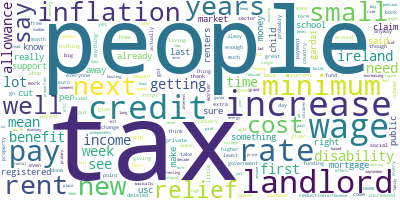

In [45]:
texts = df['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

# Processing for the word cloud (remember it needs one long string)
long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [46]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.003995 -0.039241       1        1  8.085698
15    -0.014502 -0.096897       2        1  6.962587
0     -0.116628  0.054138       3        1  6.859120
16     0.120720  0.136141       4        1  6.557626
3     -0.018804 -0.089145       5        1  6.465583
9      0.034668  0.002024       6        1  6.341575
11    -0.052413  0.087668       7        1  5.934620
13     0.078771 -0.047865       8        1  5.739458
14     0.002858  0.014016       9        1  5.455460
5     -0.100495 -0.042769      10        1  5.359909
6      0.049164  0.035150      11        1  4.976521
4      0.083851 -0.047511      12        1  4.504601
10     0.051106 -0.044064      13        1  4.357195
12     0.018159 -0.064271      14        1  4.095058
18     0.058863  0.035381      15        1  3.671105
1     -0.035667  0.038345      16        1  3.104668
17    -0.058420 -0.039001      17        1  3.099936
19    -0.036167  0.025284      18        1  2.996760
2     -0.072091  0.076454      19        1  2.871239
7      0.003032  0.006163      20        1  2.561283, topic_info=               Term       Freq      Total Category  logprob  loglift
38             wage  29.000000  29.000000  Default  30.0000  30.0000
214            rate  20.000000  20.000000  Default  29.0000  29.0000
874      disability  16.000000  16.000000  Default  28.0000  28.0000
354         deleted   7.000000   7.000000  Default  27.0000  27.0000
472           small  19.000000  19.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
11           people   0.593131  37.450236  Topic20  -5.4487  -0.4807
440   accommodation   0.593115   3.960934  Topic20  -5.4487   1.7658
1202        feeling   0.593114   2.408893  Topic20  -5.4487   2.2631
134           rainy   0.593114   3.425668  Topic20  -5.4487   1.9110
1678       fairness   0.593114   2.066385  Topic20  -5.4487   2.4165

[1271 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
427       7  0.648647    aah
477       6  0.342638   able
477       9  0.171319   able
477      12  0.171319   able
477      13  0.171319   able
...     ...       ...    ...
550       7  0.169500    yet
550       8  0.169500    yet
550      14  0.169500    yet
550      16  0.169500    yet
1640     14  0.695767  yikes

[2339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 16, 1, 17, 4, 10, 12, 14, 15, 6, 7, 5, 11, 13, 19, 2, 18, 20, 3, 8])

In [47]:
len(words)

479

In [48]:
words[0]

['posting',
 'bit',
 'early',
 'people',
 'know',
 'go',
 'starts',
 'feel',
 'free',
 'chat',
 'certain',
 'bits',
 'coming',
 'already']

In [49]:
# Adding our predicted topic (based on highest affinity score) and the corresponding score to the dataframe
predicted_topics = []
predicted_scores = []

for word in words:
    # Gets the predicted topics for a given document
    pred_topics = lda_model.get_document_topics(id2word.doc2bow(word), minimum_probability=None)
    # Sort the predicted topics by max score
    pred_topics.sort(reverse=True, key=lambda x: x[1])
    # Add the topic and socre to their respective lists
    predicted_topics.append(pred_topics[0][0])
    predicted_scores.append(pred_topics[0][1])
df['predicted_topic'] = predicted_topics
df['predicted_score'] = predicted_scores

In [50]:
df.head()

,Comment,ID,processsed_text,predicted_topic,predicted_score
0,Posting a bit early so people know where to go...,1,Posting a bit early so people know where to go...,13,0.936662
1,20% fare reduction on public transport continu...,2,20% fare reduction on public transport continu...,0,0.864279
2,This is good.,3,This is good,4,0.524982
3,"Aaaaaahhhhh, what have the Greens done for us!",4,Aaaaaahhhhh what have the Greens done for us,16,0.809983
4,"€67 million to provide 16,000 craft apprentice...",5,€67 million to provide 16000 craft apprentices...,15,0.841654


In [52]:
# Exploring how consistantly the actual groups got topics modelled to them
counts = []
for group in range(num_topics):
    # An array whose elements we can increment to count the number of time a topic appeared for a group
    count = np.zeros(num_topics)
    for prediction in df[df['ID'] == group].dropna()['predicted_topic']:
        count[int(prediction)] += 1
    # appending a list of the count of the most common topic, the number of topics and the ratio of those
    counts.append([max(count), sum(count), max(count)/sum(count)])

C:\Users\aad.sray\AppData\Local\Temp\ipykernel_2128\3302902273.py:9: RuntimeWarning: invalid value encountered in scalar divide
  counts.append([max(count), sum(count), max(count)/sum(count)])


In [53]:
# Exploring how consistently the actual groups got topics modeled to them
counts = []

for group in range(num_topics):
    # An array whose elements we can increment to count the number of times a topic appeared for a group
    count = np.zeros(num_topics)
    
    for prediction in df[df['ID'] == group].dropna()['predicted_topic']:
        count[int(prediction)] += 1
    
    # Check if the denominator is zero before performing the division
    if sum(count) != 0:
        counts.append([max(count), sum(count), max(count)/sum(count)])
    else:
        # Handle the case where the denominator is zero (e.g., set the ratio to 0 or handle it accordingly)
        counts.append([max(count), sum(count), 0])


In [54]:
counts

[[0.0, 0.0, 0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0]]

### Additional Visualisations 

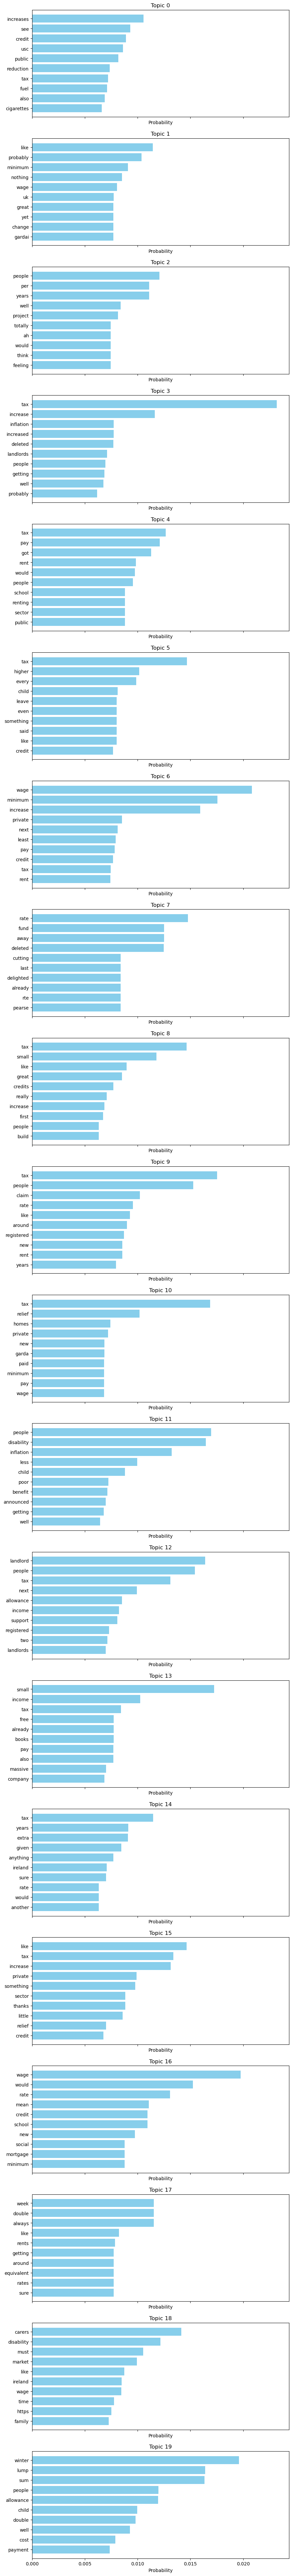

In [69]:
# Define number of words for each topic

num_words = 10

# Create a bar chart for the top words in each topic

fig, axes = plt.subplots(num_topics, 1, figsize=(10, 5 * num_topics), sharex=True)
for topic_id in range(num_topics):
    words, probabilities = zip(*lda_model.show_topic(topic_id, topn=num_words))
    axes[topic_id].barh(np.arange(len(words)), probabilities, align='center', color='skyblue')
    axes[topic_id].set_yticks(np.arange(len(words)))
    axes[topic_id].set_yticklabels(words)
    axes[topic_id].invert_yaxis()  
    axes[topic_id].set_title(f'Topic {topic_id}')
    axes[topic_id].set_xlabel('Probability')
plt.show()


C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


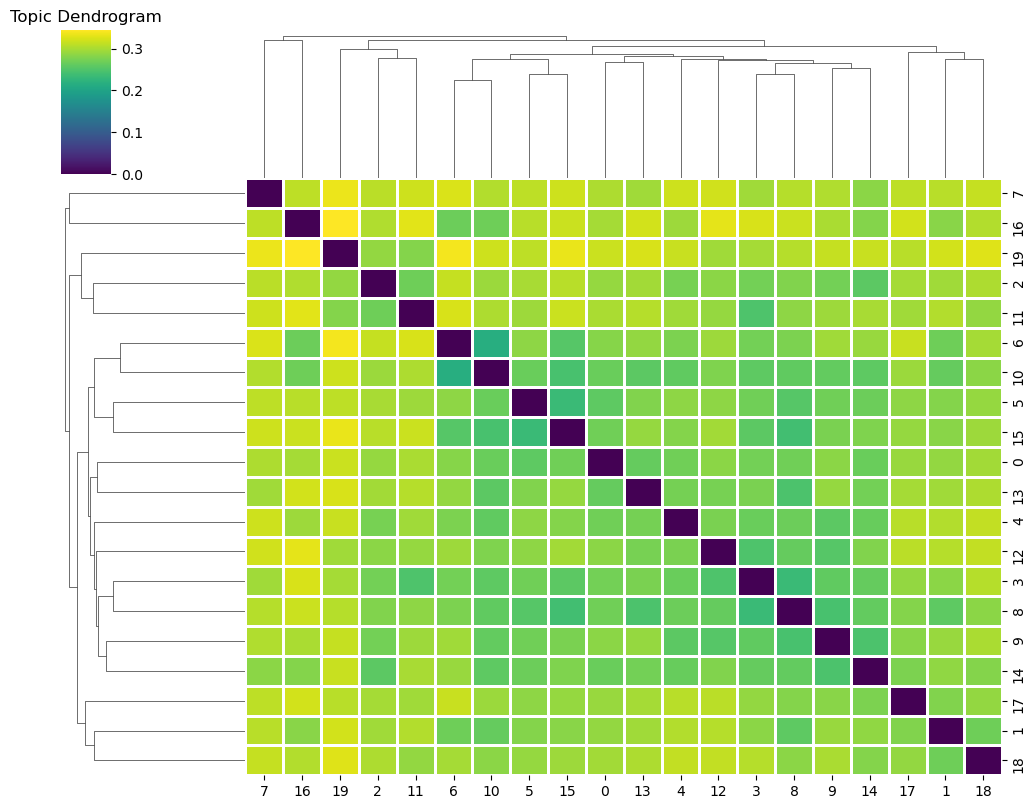

In [58]:
import seaborn as sns



# Calculate topic distances for dendrogram using Hellinger distance
topic_distances = np.array([[gensim.matutils.hellinger(lda_model.get_topic_terms(i), lda_model.get_topic_terms(j)) for i in range(num_topics)] for j in range(num_topics)])

# Create a dendrogram
sns.clustermap(topic_distances, method='average', cmap='viridis', linewidths=.75, figsize=(10, 8))
plt.title('Topic Dendrogram')
plt.show()
